In [1]:
from dfssim import DFS
import numpy as np
from  phasesensor import *

from astropy.io import fits
from scipy.ndimage import zoom, rotate
import glob
import matplotlib.pyplot as plt

In [2]:
pixsize = 0.07 * (16/24)
d = DFS(pixsize=pixsize)

In [3]:
d_im = d.mkimage()

In [4]:

ninoxdir = '/home/pbenac/home/Thesis/ninox_images'

#import pyds9

# Connect to ds9
#ds9 = pyds9.DS9()

# Get a list of all the files
n_filelist = glob.glob(ninoxdir + '/*')
n_filelist.sort()

n_filelist

['/home/pbenac/home/Thesis/ninox_images/10302020_flatmir_pupilplane.fits',
 '/home/pbenac/home/Thesis/ninox_images/11042020_newsource_1mmbeam',
 '/home/pbenac/home/Thesis/ninox_images/11062020_dark_1100msexpo',
 '/home/pbenac/home/Thesis/ninox_images/11062020_fringes_25umpinh_1100msexpo',
 '/home/pbenac/home/Thesis/ninox_images/11062020_fringes_25umpinh_1100msexpo_10umadjustmt',
 '/home/pbenac/home/Thesis/ninox_images/11062020_fringes_25umpinh_1100msexpo_20umadjustmt',
 '/home/pbenac/home/Thesis/ninox_images/11132020_bothmir_10umadj_1100msexpo.fits',
 '/home/pbenac/home/Thesis/ninox_images/11132020_bothmir_1100msexpo.fits',
 '/home/pbenac/home/Thesis/ninox_images/11132020_bothmir_nicefringes_1100msexpo.fits',
 '/home/pbenac/home/Thesis/ninox_images/11202020_1sec_dark.fits',
 '/home/pbenac/home/Thesis/ninox_images/11202020_500msec_dark.fits',
 '/home/pbenac/home/Thesis/ninox_images/11202020_img1.fits',
 '/home/pbenac/home/Thesis/ninox_images/11202020_img10.fits',
 '/home/pbenac/home/The

In [36]:
hdul = fits.open(n_filelist[-14]) # image 1
sec_dark = hdul[0].data
sec_dark = sec_dark[0][:][:]

In [68]:
hdul = fits.open(n_filelist[-12]) # image 1
data1 = hdul[0].data
data1 = data1[0][:][:]
dc_data1 = data1 - sec_dark
# print(data.shape)
# plt.imshow(data, cmap='gray')
hdul = fits.open(n_filelist[-9]) #image 2
data2 = hdul[0].data
data2 = data2[0][:][:]
dc_data2 = data2 - sec_dark

# print(data1.shape)
# plt.imshow(data1, cmap='gray')
hdul = fits.open(n_filelist[-8]) #image 3
data3 = hdul[0].data
data3 = data3[0][:][:]
dc_data3 = data3 - sec_dark

# print(data1.shape)
# plt.imshow(data1, cmap='gray')

hdul = fits.open(n_filelist[-7]) #image 4
data4 = hdul[0].data
data4 = data4[0][:][:]
dc_data4 = data4 - sec_dark


hdul = fits.open(n_filelist[-6]) #image 5
data5 = hdul[0].data
data5 = data5[0][:][:]
dc_data5 = data5 - sec_dark

hdul = fits.open(n_filelist[-5]) #image 6
data6 = hdul[0].data
data6 = data6[0][:][:]
dc_data6 = data6 - sec_dark

hdul = fits.open(n_filelist[-4]) #image 7
data7 = hdul[0].data
data7 = data7[0][:][:]
dc_data7 = data7 - sec_dark


hdul = fits.open(n_filelist[-3]) #image 8
data8 = hdul[0].data
data8 = data8[0][:][:]
dc_data8 = data8 - sec_dark

hdul = fits.open(n_filelist[-2]) #image 9
data9 = hdul[0].data
data9 = data9[0][:][:]
dc_data9 = data9 - sec_dark

hdul = fits.open(n_filelist[-11]) #image 10
data10 = hdul[0].data
data10 = data10[0][:][:]
dc_data10 = data10 - sec_dark

hdul = fits.open(n_filelist[-10]) #image 11
data11 = hdul[0].data
data11 = data11[0][:][:]
dc_data11 = data11 - sec_dark

dc_images = [dc_data1, dc_data2, dc_data3, dc_data4, dc_data5, dc_data6, dc_data7, dc_data8, dc_data9, dc_data10, dc_data11]

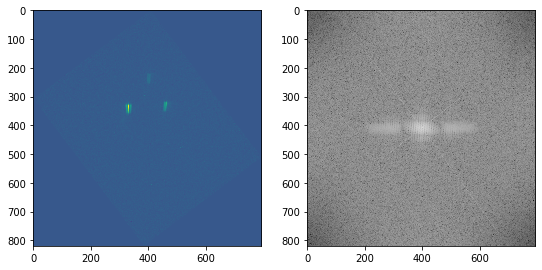

In [60]:
rot_angle = -53
plt.figure(figsize=(9,6))
plt.subplot(121)
plt.imshow(rotate(dc_data1, rot_angle))
plt.subplot(122)
plt.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft2(rotate(dc_data1, rot_angle))))), cmap='gray')


In [89]:
rotated_images = []
FT_rotated_images = []
rotation_angle = -53 # degrees
for i, image in enumerate(dc_images):
    print(i)
    rotated_images.append(rotate(image, rotation_angle))
    FT_rotated_images.append(np.fft.fftshift(np.fft.fft2(rotated_images[i])))


0
1
2
3
4
5
6
7
8
9
10


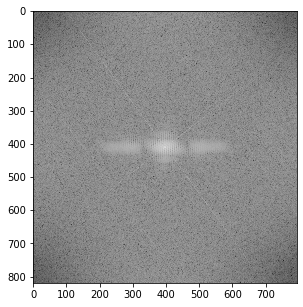

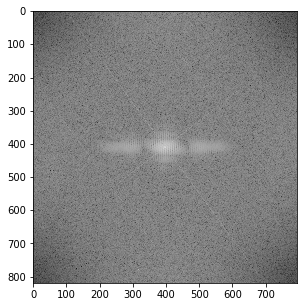

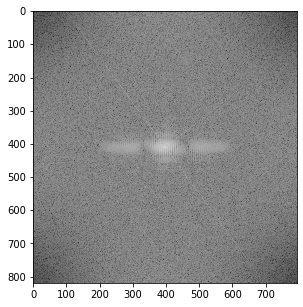

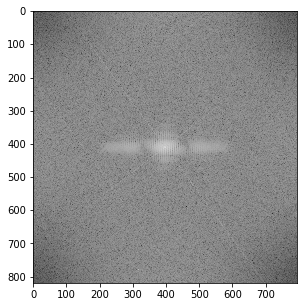

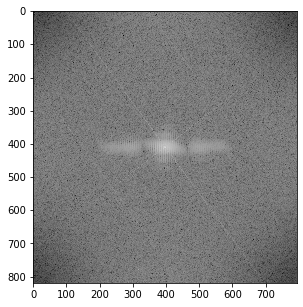

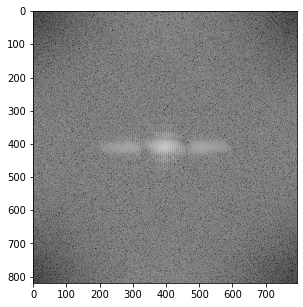

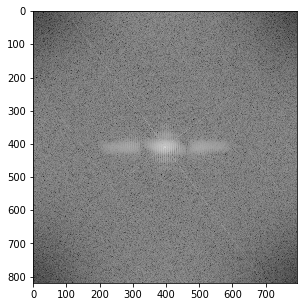

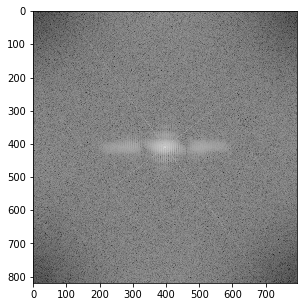

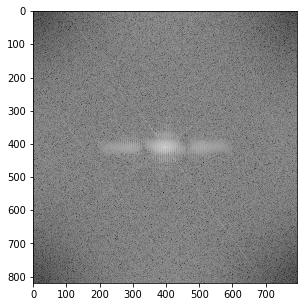

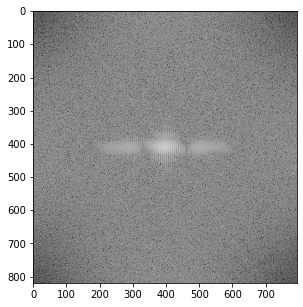

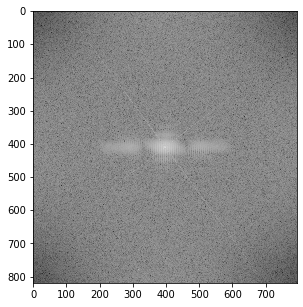

In [91]:
for i, FTimage in enumerate(FT_rotated_images):
    plt.figure(figsize=(5,5))
    plt.imshow(np.log10(np.abs(FT_rotated_images[i])), cmap='gray')

In [35]:
hdul[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    3                                                  
NAXIS1  =                  640                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                    1                                                  
DATAMIN =                    0                                                  
DATAMAX =                16383                                                  
DATE    = '2020-11-20T13:39:31'                                                 
DATE_OBS= ''                                                                    
          AXIS3UNT= 'Grey scale monochrome'                                     
          AXIS1DIM=           640.000000                                        
          AXIS1UNT= 'Ratio' 

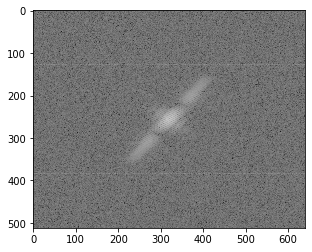

In [65]:
plt.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft2(dc_data1)))), cmap='gray')
ftimage1 = np.abs(np.fft.fftshift(np.fft.fft2(dc_data1)))

/home/pbenac/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/pbenac/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


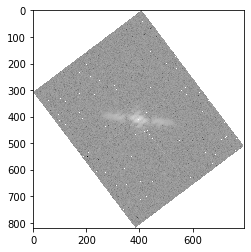

In [67]:
plt.imshow(np.log10(rotate(ftimage1, -53)), cmap='gray')

In [43]:
xcens = [300, 210]#, 295, 390]
ycens = [150, 280]#, 255, 150]


wavefrontmap = np.zeros((80,80))
wavefrontmap[:,40:] = 1

boxsize = 40
imsize = 100
edgewidth = 8
ccmin = int(53 * boxsize / 80)
ccmax = int(77 * boxsize / 80)


dispersion = 5 # arcsec per micron
PixelsPerMicron = dispersion / pixsize
Wavelength = ( 1.358 + 1.027 ) / 2.

# Conversion of pixel shift of FFT peak to nm of piston error
PixPerNm = boxsize  / PixelsPerMicron / Wavelength**2 / 1000.

#pd = PhaseData(dc_data, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_1 = PhaseData(dc_data1, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_2 = PhaseData(dc_data2, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_3 = PhaseData(dc_data3, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_4 = PhaseData(dc_data4, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_5 = PhaseData(dc_data5, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_6 = PhaseData(dc_data6, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_7 = PhaseData(dc_data7, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_8 = PhaseData(dc_data8, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_9 = PhaseData(dc_data9, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_10 = PhaseData(dc_data10, xcen=xcens, ycen=ycens, n=50, edgewidth=5)
pd_11 = PhaseData(dc_data11, xcen=xcens, ycen=ycens, n=50, edgewidth=5)


pd_2.computeresults(pd_1, ccmin, ccmax, PixPerNm, Wavelength)
pd_3.computeresults(pd_2, ccmin, ccmax, PixPerNm, Wavelength)

In [44]:
pd_4.computeresults(pd_3,ccmin, ccmax, PixPerNm, Wavelength)

In [46]:
pd_2.dfspiston

array([25.11948687, 18.06289028])

In [25]:
wavefrontmap = np.zeros((80,80))
wavefrontmap[:,40:] = 1

boxsize = 40
imsize = 100
edgewidth = 8
ccmin = int(53 * boxsize / 80)
ccmax = int(77 * boxsize / 80)


dispersion = 5 # arcsec per micron
PixelsPerMicron = dispersion / pixsize
Wavelength = ( 1.358 + 1.027 ) / 2.

# Conversion of pixel shift of FFT peak to nm of piston error
PixPerNm = boxsize  / PixelsPerMicron / Wavelength**2 / 1000.

#   Generate reference image
d = DFS(pupilpix=0.025,imsize=imsize, pixsize = pixsize, dispersion = dispersion)
refimage = d.mkimage()

#   Measure reference image
ref = PhaseData(refimage, [imsize/2], [imsize/2], boxsize, edgewidth)
ref.computeresults(ref, ccmin, ccmax, PixPerNm, Wavelength)

#   Check gain

inputs = []
outputs = []

for piston in np.linspace(-10e-6,10e-6,51):

    image = d.mkimage(piston=piston)
    im = PhaseData(image, [imsize/2], [imsize/2], boxsize, edgewidth, refboxes=ref.boxavg)
    im.computeresults(ref, ccmin, ccmax, PixPerNm, Wavelength)

    measuredpiston = -(im.dfspiston - ref.dfspiston)
    print (piston * 1e9, measuredpiston)

    inputs.append(piston*1e9)
    outputs.append(measuredpiston[0])

inputs = np.asarray(inputs)
outputs = np.asarray(outputs)

import matplotlib.pyplot as pl
pl.plot(inputs, outputs-inputs,'.-')
pl.xlabel("Piston input to simulation")
pl.ylabel("Measured - Input")

pl.figure()
pl.plot(inputs, outputs,'.-')
pl.plot(inputs, inputs, '-')
pl.xlabel("Piston input to simulation")
pl.ylabel("Measured piston")


pl.show()

-10000.0 [-9812.27136381]
-9600.000000000002 [-9253.72506447]
-9200.0 [-8839.70693126]
-8800.0 [-8433.4556012]
-8400.0 [-8085.41326317]
-8000.000000000001 [-7739.30388008]
-7600.0 [-7442.98240536]
-7200.000000000001 [-7108.84899627]
-6800.000000000001 [-6767.03680215]
-6400.000000000001 [-6347.69991384]
-6000.0 [-5854.6366043]
-5600.000000000001 [-5321.953294]
-5200.0 [-4908.52397604]
-4800.000000000001 [-4534.09194003]
-4400.0 [-4178.08869796]
-4000.0000000000005 [-3863.86220765]
-3600.0000000000005 [-3544.9924434]
-3200.0 [-3189.61629088]
-2800.0000000000005 [-2836.4858542]
-2400.0 [-2428.58087443]
-1999.9999999999995 [-1900.40372972]
-1600.0 [-1412.27569233]
-1200.0000000000005 [-1011.16451637]
-800.0000000000008 [-640.49402948]
-399.99999999999955 [-308.56292499]
0.0 [-0.]


KeyboardInterrupt: 

In [ ]:
0.07 * 0.25